<a href="https://colab.research.google.com/github/hrahmia/Gunun-tekrari-pazar-sonra-sil/blob/master/Performance_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Distribution of Amir's sales for performance review - Data Camp - Intro to Statistics - 3- step 2 - Distribution of Amir's sales

We want to estimate the probabilty of Amir selling different amounts. in order to do this, we have to what kind of distribution the 'amount' variable follows.

The key metric that the company uses to evaluate salespeople is the percent of sales they make over $1000 since the time put into each sale is usually worth a bit more than that, so the higher this metric, the better the salesperson is performing.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform
from scipy.stats import norm


In [ ]:
from google.colab import drive
drive.mount('/Rahmi')
%cd /gdrive

Mounted at /Rahmi
[Errno 2] No such file or directory: '/gdrive'
/content


In [ ]:
df = pd.read_csv('/Rahmi/MyDrive/DATA CAMP/Intro to Statistics/amir_deals.csv')

In [ ]:
print(df.index)

RangeIndex(start=0, stop=178, step=1)


In [ ]:
for i in df.index:
  print(i)

In [ ]:
df.head(10)

,Unnamed: 0,product,client,status,amount,num_users
0,1,Product F,Current,Won,7389.52,19
1,2,Product C,New,Won,4493.01,43
2,3,Product B,New,Won,5738.09,87
3,4,Product I,Current,Won,2591.24,83
4,5,Product E,Current,Won,6622.97,17
5,6,Product B,New,Won,5496.27,2
6,7,Product C,Current,Won,3043.13,29
7,8,Product N,Current,Won,7340.64,13
8,9,Product F,Current,Won,6780.85,80
9,10,Product B,Current,Won,5237.24,23


In [ ]:
client = ['musteri' if s == "Won" else "degil" for s in df['status']]
print(client)

['musteri', 'musteri', 'musteri', 'musteri', 'musteri', 'musteri', 'musteri', 'musteri', 'musteri', 'musteri', 'musteri', 'degil', 'degil', 'musteri', 'degil', 'musteri', 'musteri', 'musteri', 'musteri', 'musteri', 'degil', 'musteri', 'musteri', 'musteri', 'degil', 'musteri', 'degil', 'musteri', 'musteri', 'degil', 'musteri', 'degil', 'musteri', 'degil', 'degil', 'musteri', 'musteri', 'musteri', 'musteri', 'musteri', 'musteri', 'degil', 'musteri', 'musteri', 'musteri', 'musteri', 'musteri', 'degil', 'degil', 'musteri', 'degil', 'degil', 'musteri', 'musteri', 'musteri', 'musteri', 'musteri', 'degil', 'musteri', 'degil', 'musteri', 'musteri', 'musteri', 'musteri', 'musteri', 'degil', 'degil', 'musteri', 'degil', 'degil', 'musteri', 'musteri', 'degil', 'degil', 'degil', 'musteri', 'musteri', 'musteri', 'musteri', 'musteri', 'musteri', 'musteri', 'musteri', 'degil', 'degil', 'degil', 'degil', 'musteri', 'musteri', 'musteri', 'degil', 'musteri', 'musteri', 'musteri', 'degil', 'degil', 'degi

In [ ]:
df['amount'].sort_values(ascending = True).min()

-539.23

In [ ]:
minus = df[df['amount'] < 0]
minus

,Unnamed: 0,product,client,status,amount,num_users
138,139,Product C,Current,Won,-539.23,11


These values of 'amount' are stored in the amount column of amir_deals and follow a normal distribution with a mean of 5000 dollars and a standard deviation of 2000 dollars. As part of his performance metrics, you want to calculate the probability of Amir closing a deal worth various amounts.


PACKAGE
from scipy.stats import norm

FUNCTIONS TO USE:

norm.cdf( cumulative distribution function)  - norm.cdf(value_less_than, mean, std)

norm.ppf (Percent point function (inverse of cdf — percentiles).)

norm.pdf( probabilty density function) 

norm.rvs( random variates) (rastgele değişkenler)

In [ ]:
# What's the probabilty of Amir closing a deal less than $7500 (normal distribution with a mean of 5000 dollars and a standard deviation of 2000 )

prob_less_7500 = norm.cdf(7500, 5000, 2000)
prob_less_7500



0.8943502263331446

In [ ]:
# What's the probabilty of Amir closing a deal more than $1000

prob_more_1000 = 1 - norm.cdf(1000, 5000, 2000)
prob_more_1000

0.9772498680518208

In [ ]:
# What's the probability of Amir closing a deal worth between $3000 and $7000?

between_3k_7k = norm.cdf(7000, 5000, 2000) - norm.cdf(3000, 5000, 2000)
between_3k_7k



0.6826894921370859

In [ ]:
# What amount will 25% of Amir's sales be less than?
what_25 = norm.ppf(0.25, 5000, 2000)
what_25

3651.0204996078364

You know that you can count on Amir 75% (1-0.25) of the time to make a sale worth at least $3651.02. This information could be useful in making company-wide sales projections.

## NEW QUESTION

The company's financial analyst is predicting that next quarter, the worth of each sale will increase by 20% and the volatility, or standard deviation, of each sale's worth will increase by 30%. To see what Amir's sales might look like next quarter under these new market conditions, you'll simulate new sales amounts using the normal distribution and store these in the new_sales DataFrame, which has already been created for you.

1 - Currently, Amir's average sale amount is $5000. Calculate what his new average amount will be if it increases by 20% and store this in new_mean.

In [ ]:
new_mean = 5000 * 1.2
new_mean

6000.0

2 - Amir's current standard deviation is $2000. Calculate what his new standard deviation will be if it increases by 30% and store this in new_sd.

In [ ]:
new_sd = 2000 * 1.3
new_sd

2600.0

3 - Create a variable called new_sales, which contains 36 simulated amounts from a normal distribution with a mean of new_mean and a standard deviation of new_sd.

In [ ]:
# burada norm.rvs(( random variates) (rastgele değişkenler) ) kullanacagiz, cunku yeni satis degerleri olusturuyoruz. DIKKAT - BUNUN ICIN MEAN VE STD YE IHTIYACIMIZ VAR!
new_sales =  norm.rvs(6000, 2600, 36)
new_sales


array([ 8137.45278749,  7487.79736909,  6687.32355677,  4491.16653678,
        8112.71690405,  6076.8911804 ,  4778.39354425,  9435.92859339,
        3692.00520844,  3371.51240231,  5215.3851873 ,  7595.73323379,
        1037.55484698, 10207.89218699,  2659.24103937,  6428.39297155,
        4110.00149754, 10302.71209642,  5373.325958  ,  3528.63960184,
       11644.92463376, 16103.15653834,  2551.65306859,  2775.19714334,
        9988.2206181 ,  5108.11111034,  5488.28549098,  7035.62659775,
        4180.24858484,  9331.31884969, 10884.62808867,  8749.9525112 ,
        5276.96099217,  7783.99111343,  7482.94121011,  7679.1244113 ])

4 - The key metric that the company uses to evaluate salespeople is the percent of sales they make over $1000 since the time put into each sale is usually worth a bit more than that, so the higher this metric, the better the salesperson is performing. 

Recall that Amir's current sales amounts have a mean of 5000 and a standard deviation of 2000, and Amir's predicted amounts in next quarter's market have a mean of 6000 and a standard deviation of 2600.

Based only on the metric of percent of sales over $1000, does Amir perform better in the current market or the predicted market?

In [ ]:
#1st scenario
# The probabilty of Amir closing a deal more than $1000 ( Mean 5000, Std = 2000)

prob_more_1000_1 = 1 - norm.cdf(1000, 5000, 2000)
print(prob_more_1000_1)

#1st scenario
# The probabilty of Amir closing a deal more than $1000 ( Mean 6000, Std = 2600)

prob_more_1000_2 = 1 - norm.cdf(1000, 6000, 2600)
print(prob_more_1000_2)


0.9772498680518208
0.9727648049862613


Amir makes sales over $1000 about 97.7% of the time, and about 97.3% of the time in the predicted market, so there's not much of a difference. However, his average sale amount is higher in the predicted market

#Central Limit Theorem

The central limit theorem states that a sampling distribution of a sample statistics approaches the normal distribution as you take more samples, no matter what the original distribution being sample from.

Yani; central limit teoremine gore, the more you take samples, the more sampling distribution  will get closer to the original distribution.

In this exercise, you'll focus on the sample mean and see the central limit theorem in action while examining the num_users column of amir_deals more closely, which contains the number of people who intend to use the product Amir is selling.

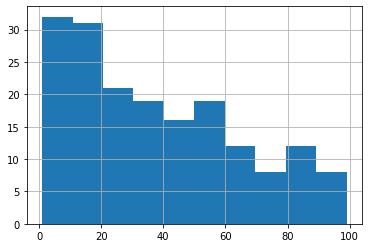

In [ ]:
#1 - Create a histogram of the num_users column of amir_deals and show the plot.

df['num_users'].hist()

In [ ]:
#2 - First,  set the seed to 104. Than, take a sample of size 20 with replacement from the num_users column of amir_deals, and take the mean.Name it samp_20.

np.random.seed(104)
samp_20 = df['num_users'].sample(20, replace = True)
print(np.mean(samp_20))



32.0


In [ ]:
#3 - Repeat this 100 times using a for loop and store as sample_means. This will take 100 different samples and calculate the mean of each.
sample_means = []
for i in range(100):
  samp_20 = df['num_users'].sample(20, replace = True)
  mean_samp_20 = np.mean(samp_20)
  sample_means.append(mean_samp_20)
print(sample_means)

[31.35, 45.05, 33.55, 38.15, 50.85, 31.85, 34.65, 36.25, 38.9, 44.05, 35.45, 37.6, 37.95, 28.85, 33.3, 31.65, 45.5, 43.2, 24.4, 41.05, 37.2, 39.3, 29.45, 33.55, 45.3, 45.1, 30.95, 36.25, 37.65, 42.55, 34.55, 41.1, 36.9, 42.45, 38.45, 45.9, 42.7, 38.4, 32.55, 30.25, 38.0, 38.75, 49.3, 39.55, 49.05, 42.05, 41.0, 40.6, 58.25, 34.55, 51.2, 34.15, 36.95, 42.45, 41.85, 33.2, 36.15, 37.55, 34.2, 29.75, 42.35, 43.75, 29.0, 32.05, 31.65, 44.6, 30.85, 29.6, 37.7, 33.1, 36.35, 40.65, 45.7, 33.8, 40.1, 39.9, 33.5, 32.65, 32.85, 42.85, 35.4, 31.7, 32.0, 33.85, 36.6, 44.35, 39.9, 37.0, 37.3, 42.5, 38.35, 42.8, 44.55, 30.3, 50.45, 42.35, 40.65, 29.85, 39.3, 33.1]


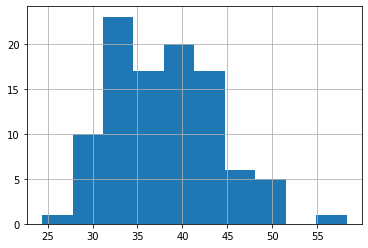

In [ ]:
# 4 - Convert sample_means into a pd.Series, create a histogram of the sample_means, and show the plot.
sample_means = pd.Series(sample_means)
sample_means.hist()

# COMPARING AN EMPLOYEE'S SALE TO WHOLE COMPANY'S SALE TO CHECK THE PERFORMANCE
** The mean of means **

You want to know what the average number of users (num_users) is per deal, but you want to know this number for the entire company so that you can see if Amir's deals have more or fewer users than the company's average deal. The problem is that over the past year, the company has worked on more than ten thousand deals, so it's not realistic to compile all the data. Instead, you'll estimate the mean by taking several random samples of deals, since this is much easier than collecting data from everyone in the company. Burda ana datayi alamadigim icin amirin datasini copy edip kullancam


In [ ]:
#0 all_deals = df.copy()
all_deals = df.copy()

In [ ]:
#1 - Set the random seed to 321.
np.random.seed(321)

In [ ]:
#2 - Take 30 samples (with replacement) of size 20 from all_deals['num_users'] and take the mean of each sample. Store the sample means in sample_means. And get the histogram 

sample_means = []
for i in range(30):
  samples = all_deals['num_users'].sample(20, replace = True)
  mean_samples = np.mean(samples)
  sample_means.append(mean_samples)
print(sample_means)
print(np.mean(sample_means))
print(np.mean(df['num_users']))






[40.95, 32.6, 40.3, 21.85, 45.2, 37.2, 36.0, 46.35, 34.95, 34.5, 40.65, 40.55, 34.8, 38.95, 37.7, 29.3, 49.85, 42.8, 38.85, 35.4, 38.6, 44.25, 44.55, 42.9, 34.95, 36.3, 42.3, 47.7, 37.55, 36.8]
38.821666666666665
37.651685393258425


Amir's average number of users is very close to the overall average, so it looks like he's meeting expectations. Make sure to note this in his performance review!

[5048, 5057, 5066, 5049, 4984, 4989, 4903, 5041, 5003, 5084, 5032, 5094, 4936, 5057, 4971, 4908, 5060, 5050, 5106, 4961, 5064, 5010, 4916, 5013, 4949, 4968, 4968, 5134, 5108, 4951, 4867, 5033, 4962, 4971, 4997, 4925, 5016, 5022, 4959, 4974, 4916, 4938, 5046, 4990, 5069, 4933, 5090, 4949, 4991, 4930, 5060, 5034, 5035, 4951, 4975, 5057, 4968, 4970, 4997, 5042, 4966, 4988, 4954, 4912, 5010, 5008, 4993, 4926, 5064, 4959, 4988, 5067, 5053, 4962, 5022, 4998, 5067, 5013, 5049, 5076, 4913, 5086, 5047, 5008, 4934, 4968, 4961, 4971, 5087, 4993, 5047, 5104, 5118, 4968, 5081, 4981, 4959, 5068, 5023, 5017, 4936, 5003, 4888, 4999, 4976, 5015, 5009, 5007, 5011, 4960, 4946, 4993, 5096, 5002, 4956, 5021, 5046, 5035, 5046, 4971, 4911, 5073, 4948, 4995, 5067, 4979, 4943, 5038, 4987, 5046, 4931, 4964, 5052, 4981, 4973, 5070, 5042, 5034, 5012, 4989, 5058, 4968, 4998, 5084, 4974, 5008, 4995, 5023, 5067, 4999, 5022, 5002, 4946, 5026, 4997, 4937, 4958, 5010, 5012, 4960, 5067, 5023, 5010, 5093, 5084, 5013, 503

(array([2.4000e+01, 5.4000e+02, 4.6680e+03, 1.8637e+04, 3.3595e+04,
        2.8843e+04, 1.1423e+04, 2.1020e+03, 1.6200e+02, 6.0000e+00]),
 array([4783. , 4828.3, 4873.6, 4918.9, 4964.2, 5009.5, 5054.8, 5100.1,
        5145.4, 5190.7, 5236. ]),
 <a list of 10 Patch objects>)

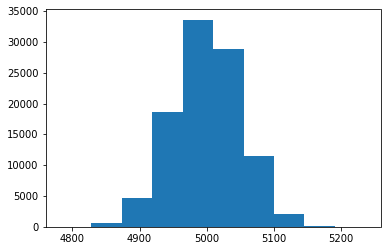

In [ ]:
from traitlets import traitlets
#Coin Example - Distribution

all_tails = []
for i in range(100000):
  tails= [0]
  for i in range(10000):
    coin = np.random.randint(0,2)
    tails.append(tails[i]+ coin)
  all_tails.append(tails[-1])
print(all_tails)

plt.hist(all_tails)



In [ ]:
arrays = [['Falcon', 'Falcon', 'Parrot', 'Parrot'],
          ['Captive', 'Wild', 'Captive', 'Wild']]
index = pd.MultiIndex.from_arrays(arrays, names = ('Animal', 'Type'))
df = pd.DataFrame({'Max_speed' : [390., 350., 30., 20.]}, index = index)
df

#df = pd.DataFrame({Max Speed': [390., 350., 30., 20.]}, index = index)


Max_speed
Animal Type              
Falcon Captive      390.0
       Wild         350.0
Parrot Captive       30.0
       Wild          20.0

In [ ]:
df.groupby(level = 0).mean()

,Max_speed
Animal,
Falcon,370.0
Parrot,25.0


In [ ]:
df.groupby(level = 1).mean()

,Max_speed
Type,
Captive,210.0
Wild,185.0
